## Notebook description

Authors:    Leone, Riccardo (RL)

Notes:     
- Plot the disconnectivity matrices resulting from the model fits of the petTOAD study
- They should go into Supplementary Figures;

Comments:
- Disconnectivity matrices derived using Lesion Quantification Toolkit in R (https://github.com/jdwor/LQT)

Sources: 

Last edit:  2023-12-13

## Code

In [204]:
# Imports
import matplotlib.pyplot as plt
from petTOAD_load import *
from petTOAD_parameter_setup import ws_disconn
# Set the cmap to inferno for better visualizaiton of differences (higher contrast)
plt.rcParams['image.cmap'] = 'ocean_r'

In [205]:
# Directories
SIM_DIR = RES_DIR / "final_simulations_log_2023-11-23"
TBL_DIR = RES_DIR / "Tables"

In [206]:
# Define functions
def plot_disconnectome(plot_title, best_w, fig, axs_row, is_group=False, subj=None, grouplist=None):
    """
    Plots the resulting disconnectome based on normative structural connectivity and the best w obtained after model fitting.

    Parameters:
    - plot_title (str): Title for the plot (e.g., "MCI WMH").
    - best_w (float): The best weight obtained after model fitting. Used for deriving the structural disconnectivity.
    - fig (matplotlib.figure.Figure): The figure object to which the subplots will belong.
    - axs_row (list of matplotlib.axes._subplots.AxesSubplot): List containing two subplot axes.
    - is_group (bool): Flag indicating whether to plot for a single subject or a group.
    - subj (str): Subject name if is_group is False.
    - grouplist (list of str): List of subject names of the same group (e.g., MCI_WMH) if is_group is True.

    Returns:
    None
    """

    
    filter_sc = np.isclose(ws_disconn, best_w)
    if not is_group:
        assert subj, print("No subject name!") 
        damage_sc = get_sc_wmh_weighted(subj, is_random = False)
        all_disc_sc = [np.clip(sc + (damage_sc * w), 0, 1) for w in ws_disconn]
        disc_sc = np.array(all_disc_sc)[filter_sc].squeeze()
    else:
        list_disc = []
        for subj in grouplist:
            damage_sc = get_sc_wmh_weighted(subj, is_random = False)
            all_disc_sc = [np.clip(sc + (damage_sc * w), 0, 1) for w in ws_disconn]
            good_disc_sc = np.array(all_disc_sc)[filter_sc]
            list_disc.append(good_disc_sc)
        disc_sc = np.mean(list_disc, axis = 0).squeeze()

    # im1 = axs_row[0].imshow(sc, vmin=0, vmax = 1)
    # cbar1 = fig.colorbar(im1, ax=axs_row[0], shrink=0.8)  
    im2 = axs_row[0].imshow(disc_sc, vmin=0, vmax = 1)
    cbar2 = fig.colorbar(im2, ax=axs_row[0], shrink=0.8)
    im3 = axs_row[1].imshow(sc - disc_sc, vmin=0, vmax = 0.25)
    cbar3 = fig.colorbar(im3, ax=axs_row[1], shrink=0.8)
    #axs_row[0].set_title("SC")
    axs_row[0].set_title(f"{plot_title}: SDC")
    axs_row[1].set_title(f"{plot_title}: SC-SDC")

In [207]:
# Load the clinical df
df_petTOAD = pd.read_csv(RES_DIR / "df_petTOAD.csv", index_col = 0)
# Load the best w and b dataframe
df_summary_best_w_b = pd.read_csv(TBL_DIR / "group-all_data-simulated_model-all_desc-best-avg-group-fits.csv", index_col = 0)
# Select best w and b for disconnectivity
best_w_disconn_cn = float(df_summary_best_w_b["CU_WMH_w"]["disconnectivity"])
best_w_disconn_mci = float(df_summary_best_w_b["MCI_WMH_w"]["disconnectivity"])
# Get list of patients in each WMH group
list_cn_wmh = df_petTOAD[df_petTOAD["Group_bin_Fazekas"] == "CN_WMH"]["PTID"].to_list()
list_mci_wmh = df_petTOAD[df_petTOAD["Group_bin_Fazekas"] == "MCI_WMH"]["PTID"].to_list()
# Load the normative structural connectivity matrix (as a global variable)
sc = load_norm_aal_sc()

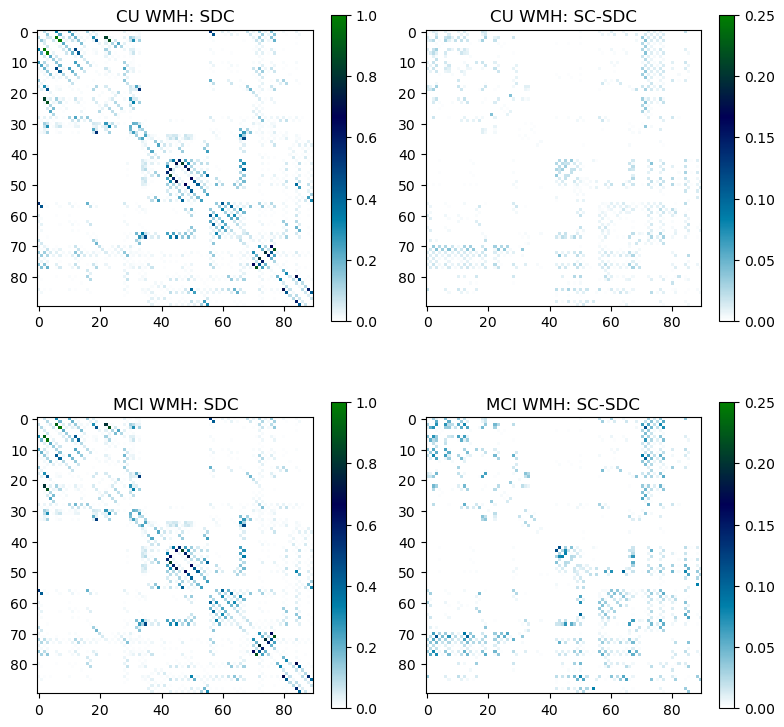

In [208]:
# Make group-averaged plots, just for ease of visualization
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (8, 8))
plot_disconnectome("CU WMH",  best_w_disconn_cn, fig, axs[0, :], is_group = True, subj = None, grouplist=list_cn_wmh)
plot_disconnectome("MCI WMH", best_w_disconn_mci, fig, axs[1, :], is_group = True, subj = None, grouplist=list_mci_wmh)
fig.tight_layout()

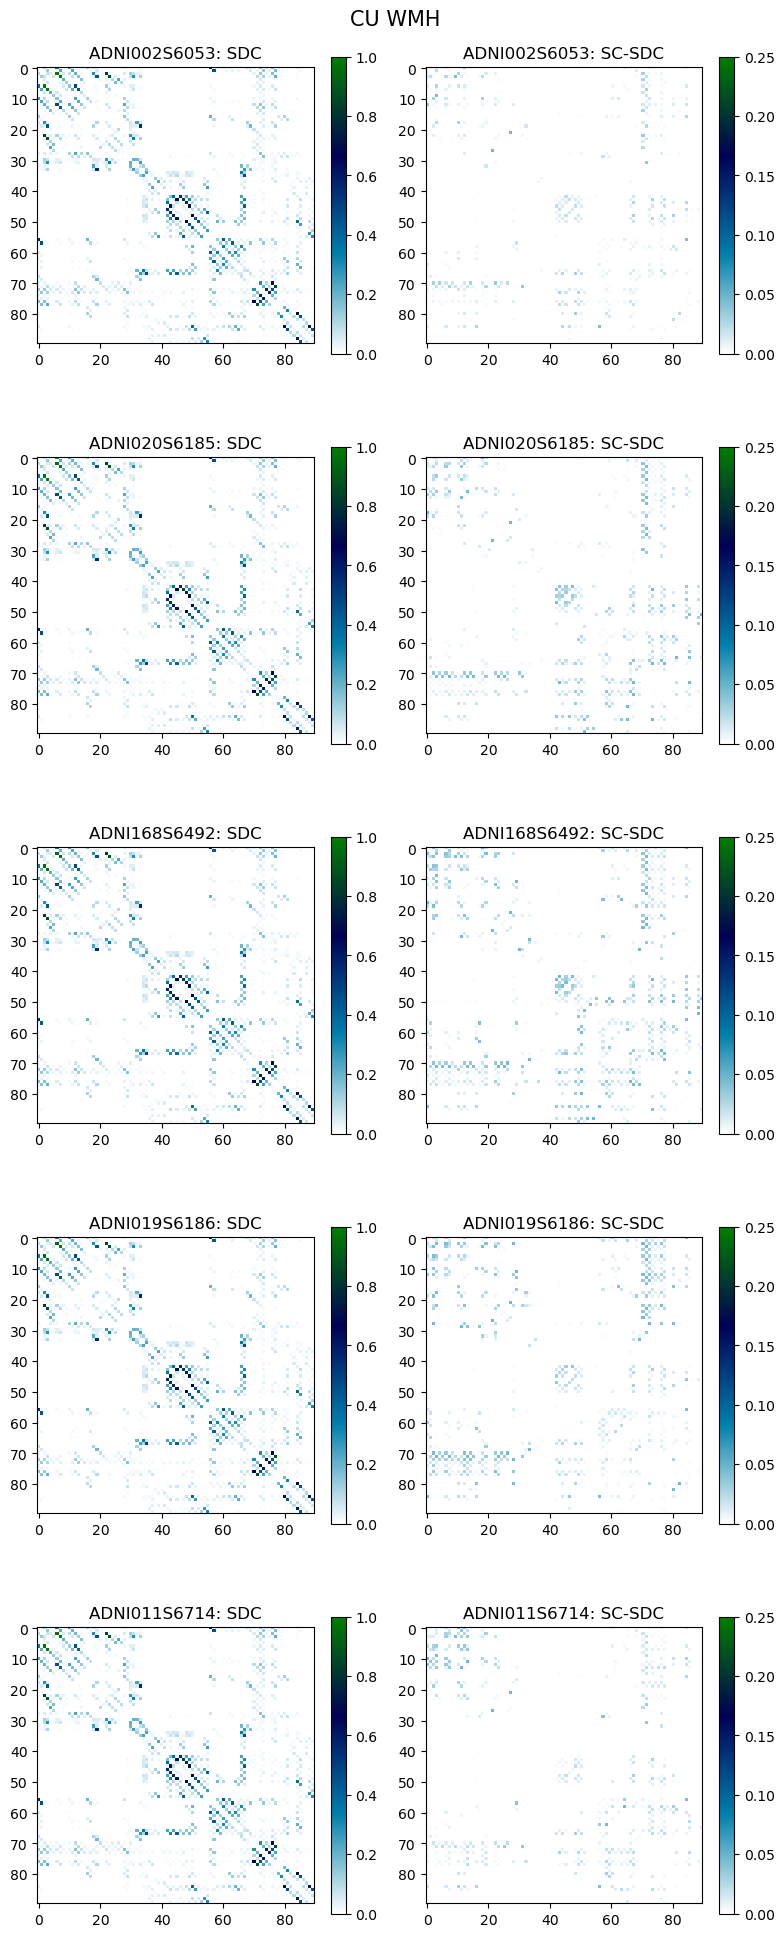

In [209]:
# Create a figure of disconnectivity matrices for 5 random subjects in the CU WMH group
np.random.seed(1991)
plots_per_group = 5
fig1, axs = plt.subplots(nrows=plots_per_group, ncols=2, figsize = (8, 20))
for row, subj in enumerate(np.random.choice(list_cn_wmh, plots_per_group)):
    plot_disconnectome(subj,  best_w_disconn_cn, fig1, axs[row, :], is_group = False, subj = subj)
fig1.suptitle("CU WMH", fontsize = 15)
fig1.tight_layout()

## Final figure

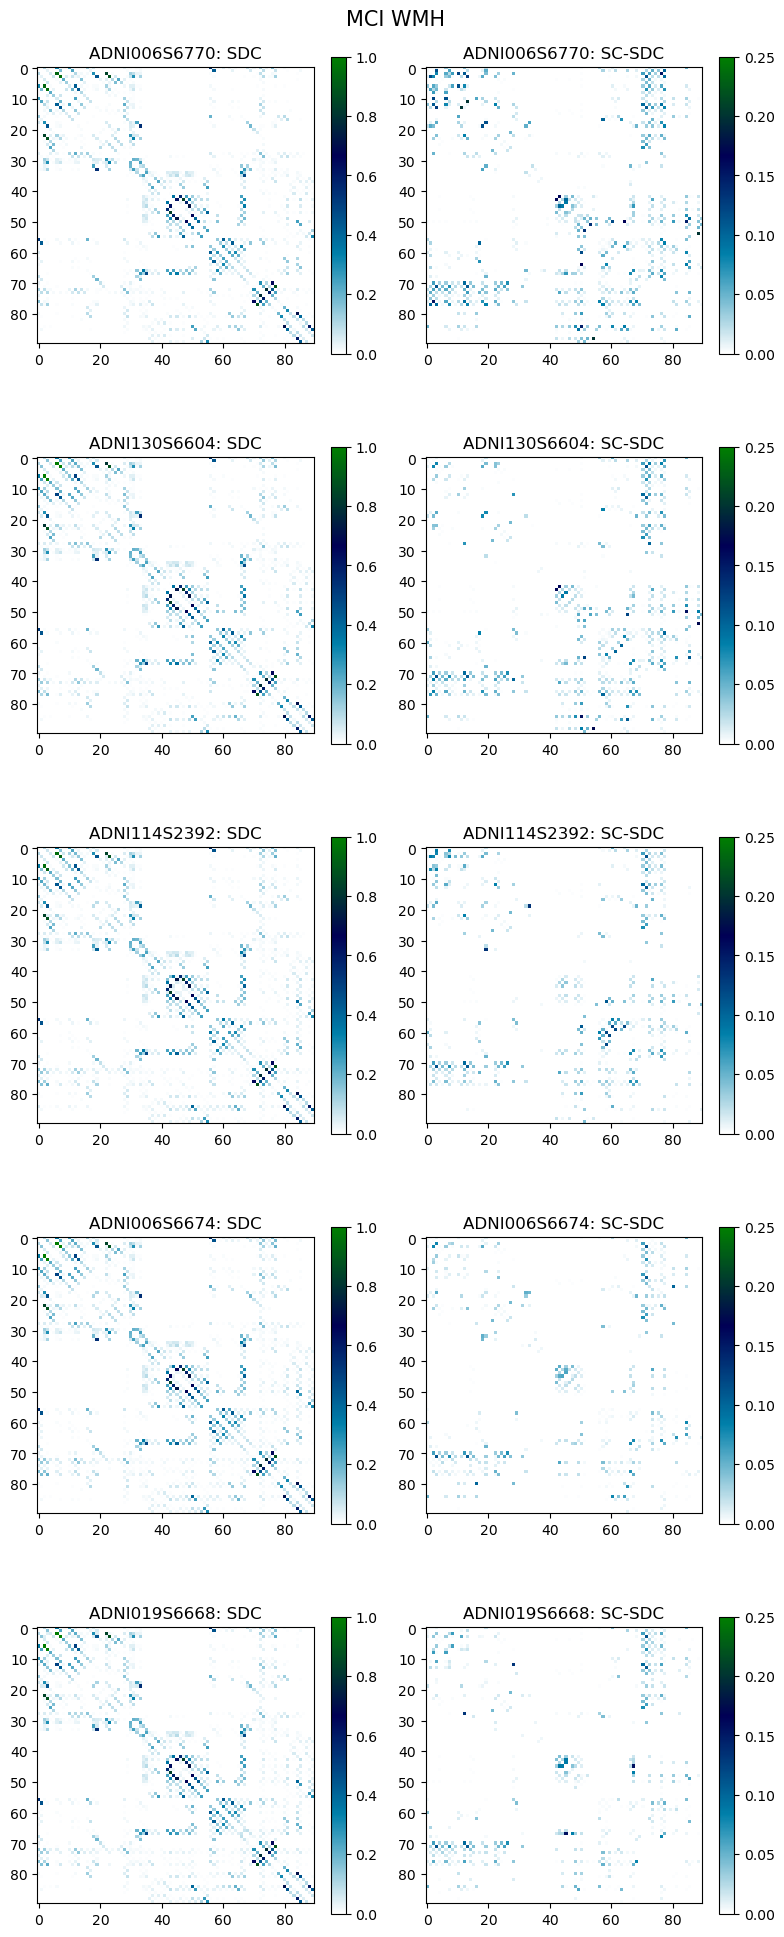

In [210]:
# Create a figure of disconnectivity matrices for 5 random subjects in the MCI WMH group
fig2, axs = plt.subplots(nrows=plots_per_group, ncols=2, figsize = (8, 20))
for row, subj in enumerate(np.random.choice(list_mci_wmh, plots_per_group)):
    plot_disconnectome(subj, best_w_disconn_mci, fig2, axs[row, :], is_group = False, subj = subj)
fig2.suptitle("MCI WMH", fontsize = 15)
fig2.tight_layout()

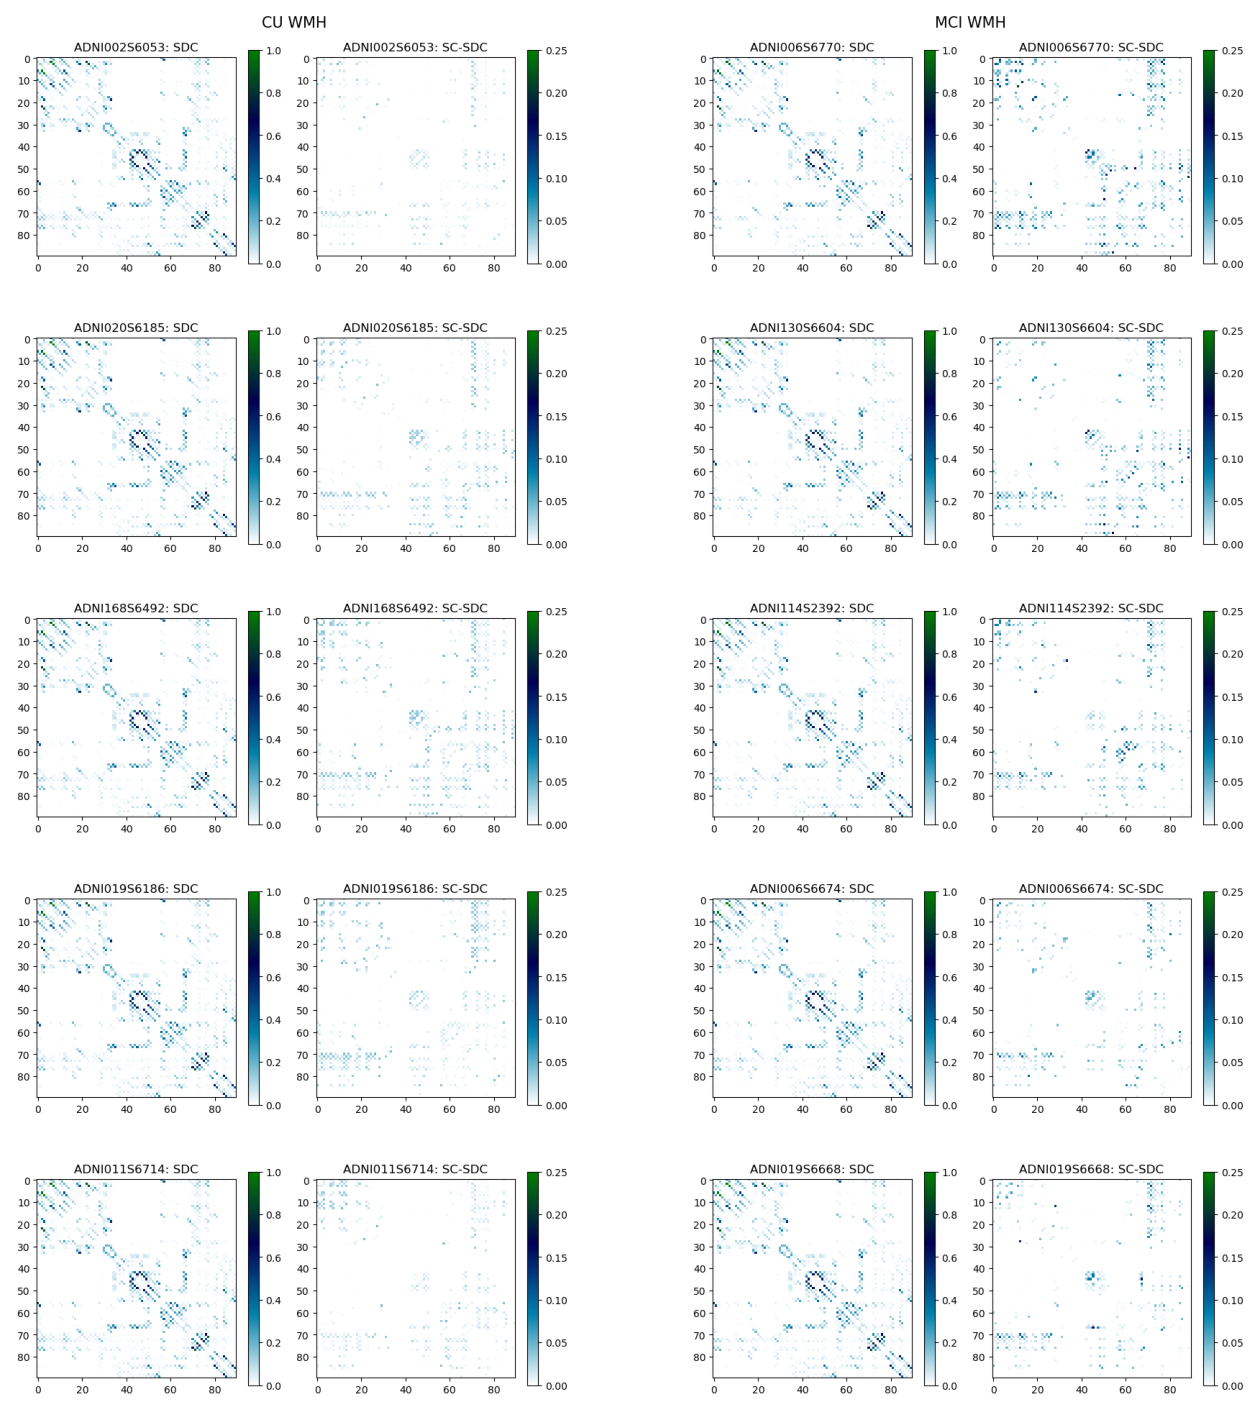

In [211]:
# Combine the figures side by side so it's clearer
fig, axs = plt.subplots(1, 2, figsize=(16, 20))  # 1 row, 2 columns
axs[0].imshow(fig1.canvas.renderer._renderer)
axs[0].axis('off')  # Turn off axis ticks and labels
axs[0].set_frame_on(False)  # Turn off frame
axs[1].imshow(fig2.canvas.renderer._renderer)
axs[1].axis('off')
axs[1].set_frame_on(False)